#### Python Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import pickle

#### Data Collection

##### Importing and Loading of the dataset from the local repository

In [2]:
df = pd.read_csv('customer_churn.csv')

##### Displaying the top 5 records of the dataset

In [3]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### Displaying the last 5 records of the dataset

In [4]:
df.tail()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


#### Exploratory Data Analysis

##### Displaying the number of rows and columns of the dataset

In [5]:
print(f"The number of rows of the dataset : {df.shape[0]}")
print(f"The number of columns of the dataset : {df.shape[1]}")

The number of rows of the dataset : 7043
The number of columns of the dataset : 21


##### Displaying the complete information of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* TotalCharges column should be of either int type or of float type. But it is currently in object type.

##### Displaying the complete statistical description of the dataset

In [7]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### Converting the datatype of the TotalCharges column

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce').astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


##### Checking for the existance of the null values in the dataset

In [9]:
df.isnull().sum()

CustomerID           0
Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

##### Removing the null values from the dataset

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### Checking for the existence of the dupicates in the dataset

In [11]:
df.duplicated().sum()

0

##### Removing the duplicate values present inside the dataset

In [12]:
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()

0

##### Removing the CustomerID column from the dataset

In [13]:
df.drop(columns='CustomerID',inplace=True)
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### Displaying random set of records of the dataset for verification

In [14]:
df.sample(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5764,Male,1,No,No,57,Yes,Yes,Fiber optic,Yes,No,No,Yes,No,Yes,Two year,No,Electronic check,93.75,5625.55,No
4627,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.50,No
433,Male,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.40,518.90,Yes
5771,Female,0,No,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,266.60,No
1516,Female,0,Yes,No,17,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,92.60,1579.70,No
1238,Female,1,No,No,16,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,96.15,1529.20,Yes
4429,Female,0,Yes,Yes,70,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),79.70,5743.30,No
2219,Male,1,No,No,20,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Electronic check,89.95,1648.45,No
6565,Male,0,Yes,No,61,Yes,Yes,Fiber optic,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.20,6375.20,No
1345,Female,0,Yes,No,57,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),100.75,5985.00,No


##### Displaying the number of numerical as well as categorical columns

In [15]:
numerical_columns = [col for col in df.columns if df[col].dtype != 'object']
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

print(f"Numerical Columns : {numerical_columns}")
print(f"Number of Numerical Columns : {len(numerical_columns)}")
print(f"Categorical Columns : {categorical_columns}")
print(f"Number of Categorical Columns : {len(categorical_columns)}")

Numerical Columns : ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
Number of Numerical Columns : 4
Categorical Columns : ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Number of Categorical Columns : 16


##### Displaying the value counts of each categorical columns

In [16]:
for col in categorical_columns :
    print(df[col].value_counts())
    print('\n')

Gender
Male      3549
Female    3483
Name: count, dtype: int64


Partner
No     3639
Yes    3393
Name: count, dtype: int64


Dependents
No     4933
Yes    2099
Name: count, dtype: int64


PhoneService
Yes    6352
No      680
Name: count, dtype: int64


MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64


OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64


TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


StreamingTV
No       

##### Displaying the number of males and females who are about to churn or not

In [17]:
print(f"Number of males who are in churn condition : {len(df[(df['Gender']=='Male')&(df['Churn']=='Yes')])}")
print(f"Number of females who are in churn condition : {len(df[(df['Gender']=='Female')&(df['Churn']=='Yes')])}")
print(f"Number of males who are in churn condition : {len(df[(df['Gender']=='Male')&(df['Churn']=='No')])}")
print(f"Number of females who are in churn condition : {len(df[(df['Gender']=='Female')&(df['Churn']=='No')])}")

Number of males who are in churn condition : 930
Number of females who are in churn condition : 939
Number of males who are in churn condition : 2619
Number of females who are in churn condition : 2544


##### Displaying the total population churning out or not

In [18]:
print(f"Total Population who are churning out : {len(df[df['Churn']=='Yes'])}")
print(f"Total Population who are not churning out : {len(df[df['Churn']=='No'])}")

Total Population who are churning out : 1869
Total Population who are not churning out : 5163


##### Displaying the percentage of males or females who are churning out

In [19]:
print(f"Percentage of Males who are churning out : {(930/1869)*100}")
print(f"Percentage of Females who are churning out : {(939/1869)*100}")

Percentage of Males who are churning out : 49.75922953451043
Percentage of Females who are churning out : 50.24077046548957


##### Displaying the Senior Citizen as well as Non Senior Citizen who are churning out

In [20]:
print(f"Number of Senior Citizen Who are churning out : {len(df[(df['SeniorCitizen']==1)&(df['Churn']=='Yes')])}")
print(f"Number of Non Senior Citizen Who are churning out : {len(df[(df['SeniorCitizen']==0)&(df['Churn']=='Yes')])}")

Number of Senior Citizen Who are churning out : 476
Number of Non Senior Citizen Who are churning out : 1393


##### Number of customers who are churning out does not have any access to the internet

In [21]:
print(f"Customers who have churned out and dont have access to the internet : {len(df[(df['OnlineSecurity']=='No internet service')&(df['OnlineBackup']=='No internet service')&(df['DeviceProtection']=='No internet service')&(df['TechSupport']=='No internet service')&(df['StreamingTV']=='No internet service')&(df['StreamingMovies']=='No internet service')&(df['Churn']=='Yes')])}")
print(f"Customers who have not churned out and dont have access to the internet : {len(df[(df['OnlineSecurity']=='No internet service')&(df['OnlineBackup']=='No internet service')&(df['DeviceProtection']=='No internet service')&(df['TechSupport']=='No internet service')&(df['StreamingTV']=='No internet service')&(df['StreamingMovies']=='No internet service')&(df['Churn']=='No')])}")

Customers who have churned out and dont have access to the internet : 113
Customers who have not churned out and dont have access to the internet : 1407


#### Data Visualization

##### Checking for the outliers of the numerical columns

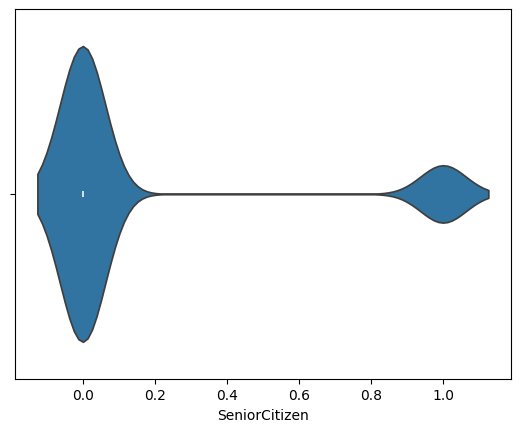

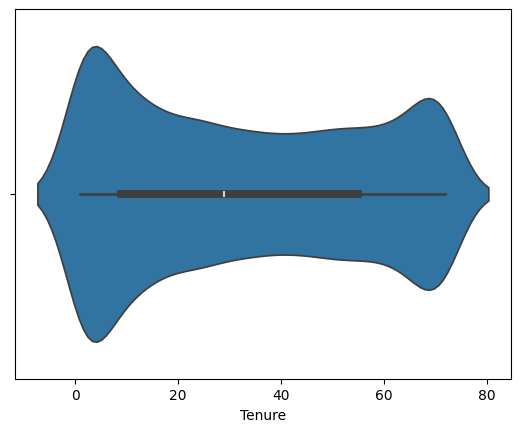

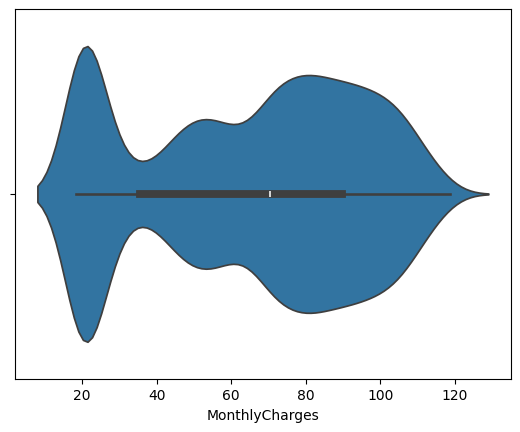

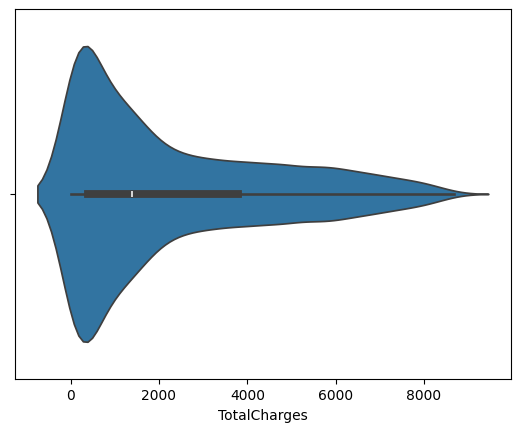

In [22]:
for col in numerical_columns :
    sns.violinplot(data=df,x=col)
    plt.show()

**Insights :**
* From the above observation, we can clearly see that there are no outliers present inside the dataset.

##### Plotting the distribution of the numerical columns of the dataset

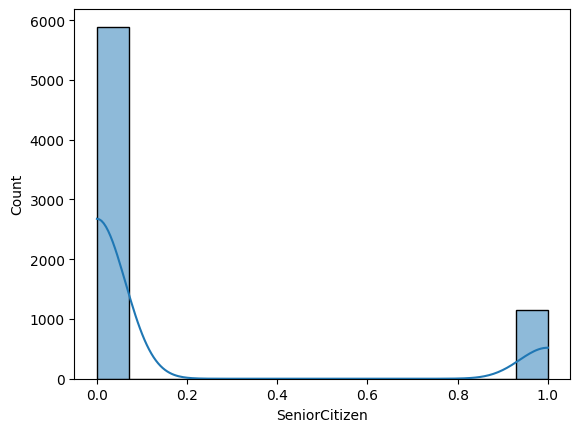

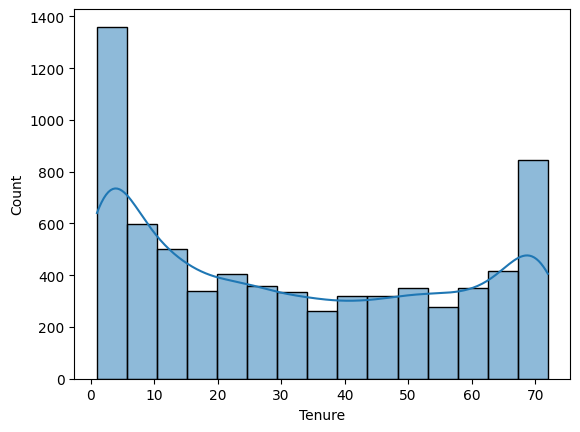

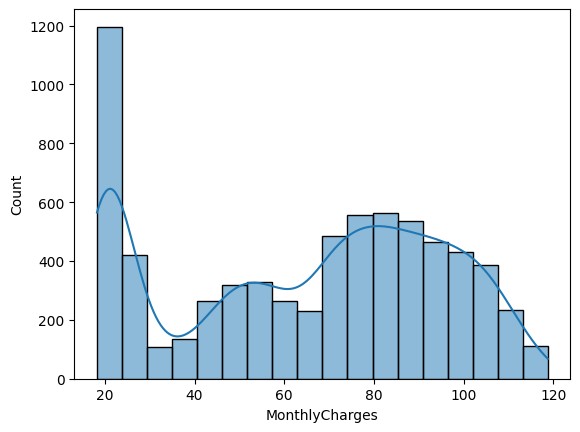

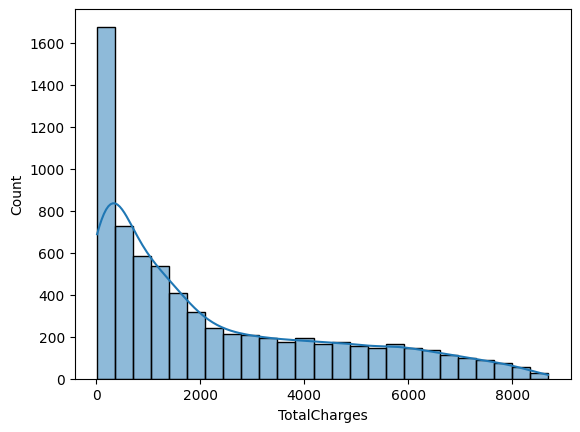

In [23]:
for col in numerical_columns :
    sns.histplot(data=df,x=col,kde=True)
    plt.show()

##### Plotting the customers who are churning out or not by gender-wise

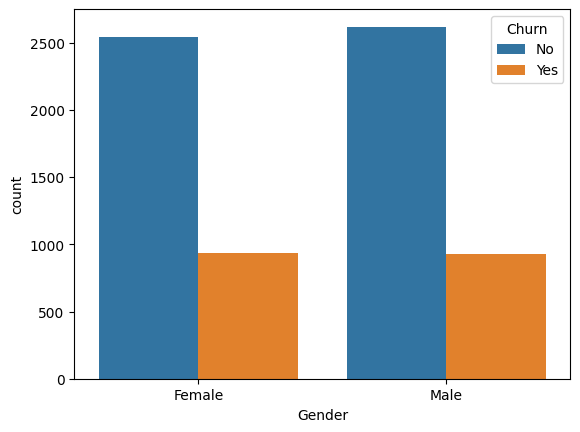

In [24]:
sns.countplot(data=df,x='Gender',hue='Churn')
plt.show()

**Insights :**
* It can be observed from the above map that the number of males as well as the number of females who are churning out is nearly equal

##### Plotting the count of Senior Citizens who are churning out

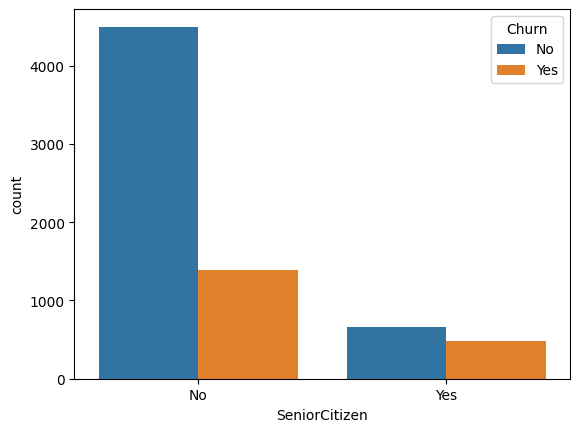

In [25]:
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
plt.xticks(ticks=[0,1],labels=['No','Yes'])
plt.show()

**Insights :**
* The number of customers who are not SeniorCitizen and are churning out are one-fourth of the number of customers who are not SeniorCitizen and are not churning out.
* The number of customers who are SeniorCitizen and are churning out are three-fourth of the number of customers who are SeniorCitizen and are not churning out.

##### Plotting the count of customers who have partner and are churning out or not

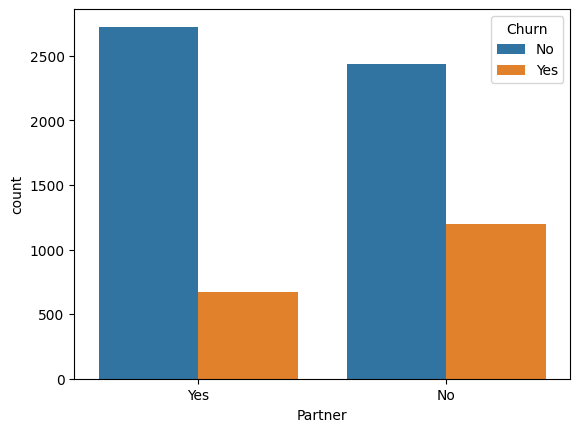

In [26]:
sns.countplot(data=df,x='Partner',hue='Churn')
plt.show()

**Insights :**
* In population who have partner, the number of customers who are churning out is nearly one-fourth of the number of customers who are not churning out.
* In population who dont have partner, the number of customers who are churning out is nearly half of the number of customers who are not churning out.

##### Plotting the count of customers who have dependents and are churning out or not

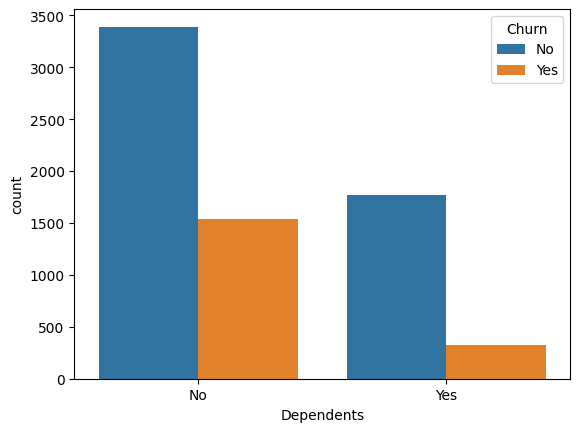

In [27]:
sns.countplot(data=df,x='Dependents',hue='Churn')
plt.show()

**Insights :**
* In positive dependents population, the number of customers who are churning out is nearly about one-fifth of the number of customers who are not churning out.
* In negative dependents population, the number of customers who are churning out is nearly about two-fifth of the number of customers who are not churning out.

##### Plotting the count of customers who are churning out have PhoneService or not

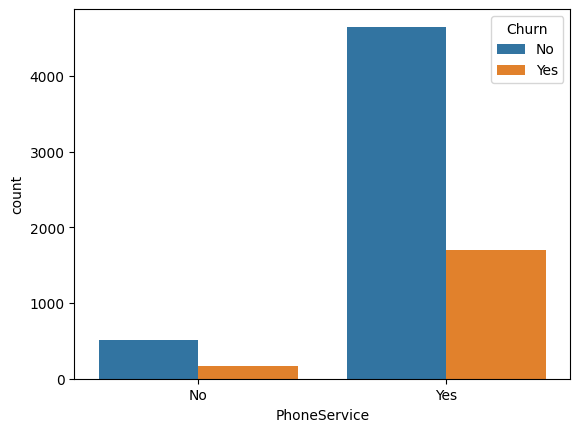

In [28]:
sns.countplot(data=df,x='PhoneService',hue='Churn')
plt.show()

##### Plotting the count of customers who are churning out having MultipleLines or not

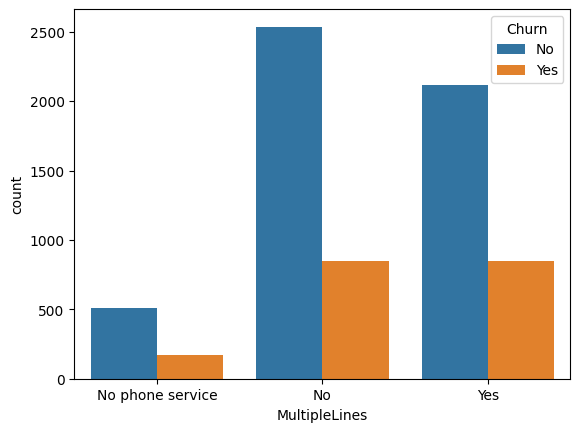

In [29]:
sns.countplot(data=df,x='MultipleLines',hue='Churn')
plt.show()

**Insights :**
* The customers who have MultipleLines as well as dont have MultipleLines are churning out more than the double the customers who dont have No Phone Service churning out.
* Most customers who dont have any MultipleLines are not churning out while least customers who dont have No Phone Service are not churning out.

##### Plotting the count of customers who are churning out having Internet Service or not

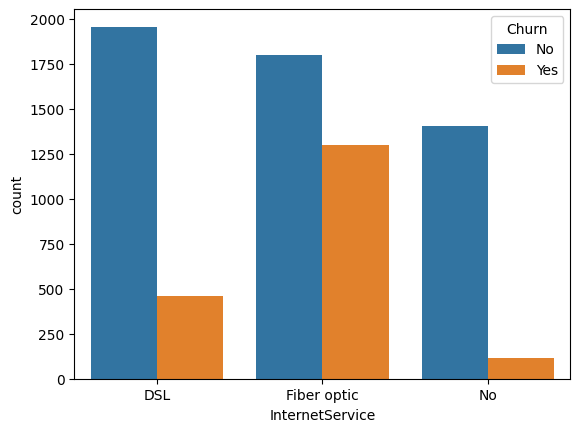

In [30]:
sns.countplot(data=df,x='InternetService',hue='Churn')
plt.show()

**Insights :**
* In case of customers not churning out, most of the customers have Fiber Optic while least customers dont have any internet Service.
* In case of customers churning out, most of the customers have Fiber Optic while least customers dont have any internet Service.

##### Plotting the count of customers who are churning out having OnlineSecurity or not

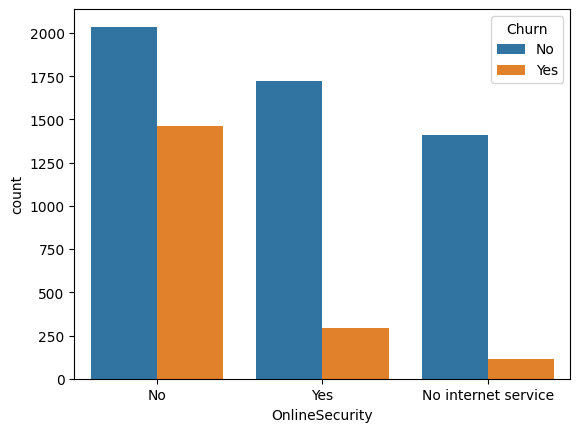

In [31]:
sns.countplot(data=df,x='OnlineSecurity',hue='Churn')
plt.show()

**Insights :**
* Most of the customers who are churning out as well as who are not churning out dont have any OnlineSecurity.
* Least customers who are churning out as well as who are not churning out dont have any Internet Service.

##### Plotting the count of the customers who are churning out having OnlineBackup or not

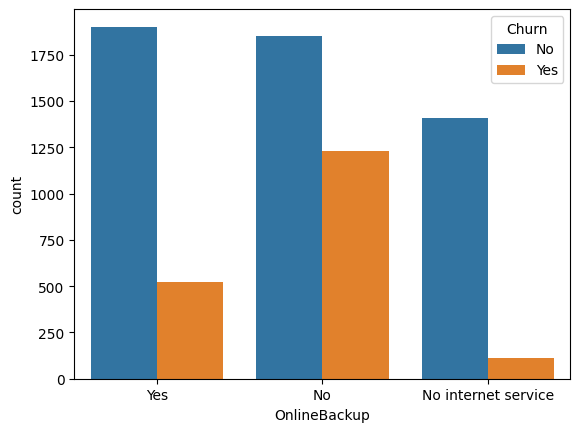

In [32]:
sns.countplot(data=df,x='OnlineBackup',hue='Churn')
plt.show()

**Insights :**
* Most of the customers who are not churning out have OnlineBackup.
* Least of the customers who are not churning out dont have any Internet Service.
* Most of the customers who are churning out dont have any Online Backup.
* Least of the customers who are churning out dont have any Internet Service.

##### Plotting the count of the customers who are churning out having Device Protection or not

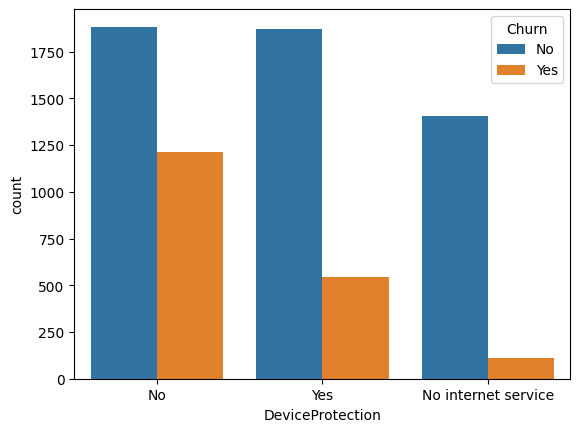

In [33]:
sns.countplot(data=df,x='DeviceProtection',hue='Churn')
plt.show()

**Insights :**
* Highest number of customers who are churning out dont have any Device Protection while lowest number of customers who are churning out dont have any Internet Service.
* Highest number of customers who are not churning out dont have any Device Protection while lowest number of customers who are not churning out dont have any Internet Service.

##### Plotting the count of the customers who are churning out having Techsupport or not

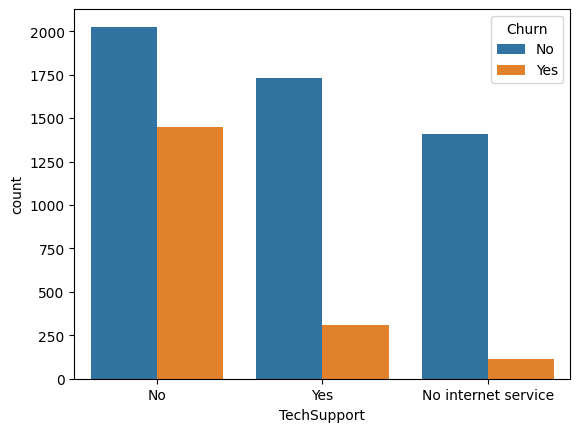

In [34]:
sns.countplot(data=df,x='TechSupport',hue='Churn')
plt.show()

**Insights :**
* Among the customers who are churning out, most customers dont have any TechSupport while least customers dont have any Internet Service.
* Among the customers who are not churning out, most customers dont have any TechSupport while least customers dont have any Internet Service.

##### Plotting the count of the customers who are churning out having StreamingTV or not

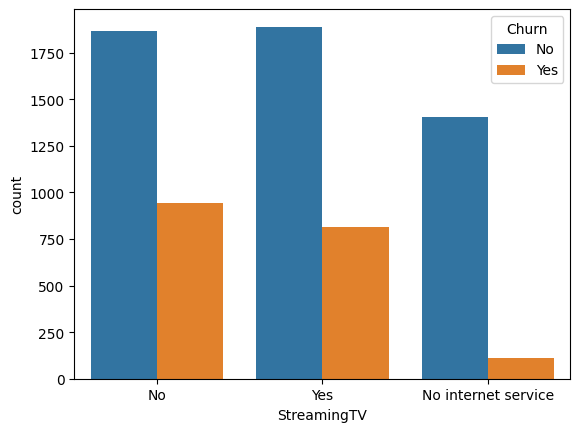

In [35]:
sns.countplot(data=df,x='StreamingTV',hue='Churn')
plt.show()

**Insights :**
* The customers who have StreamingTV as well as dont have StreamingTV are more than the customers who dont have any Internet Service in terms of customers who are not churning out.
* The customers who dont have StreamingTV are churning out most while the customers who dont have Internet Service are churning out least.

##### Plotting the count of the customers who are churning out having Streaming Movies or not

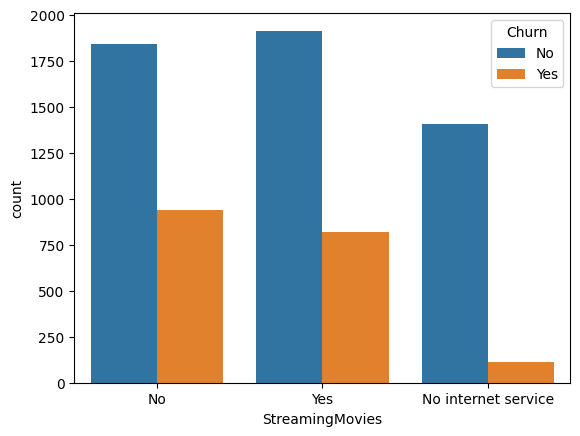

In [36]:
sns.countplot(data=df,x='StreamingMovies',hue='Churn')
plt.show()

**Insights :**
* Most of the customers who are churning out dont have any StreamingMovies while least customers who are churning out dont have any Internet Service.
* Most of the customers who are not churning out  have a StreamingMovies while least customers who are churning out dont have any Internet Service.

##### Plotting the count of the customers who are having contract or not

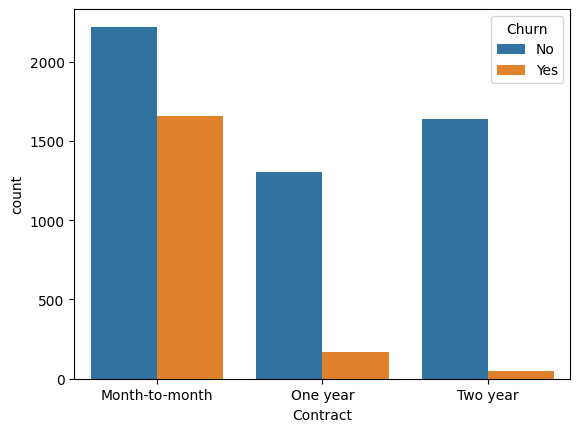

In [37]:
sns.countplot(data=df,x='Contract',hue='Churn')
plt.show()

**Insights :**
* In terms of customers who are churning out, highest number of customers have Month-to-Month Contract while lowest number of customers have Two Years Contract.
* In terms of customers who are not churning out, highest number of customers have Month-to-Month Contract while lowest number of customers have One Year Contract.

##### Plotting the count of the customers who are having PaperlessBilling or not

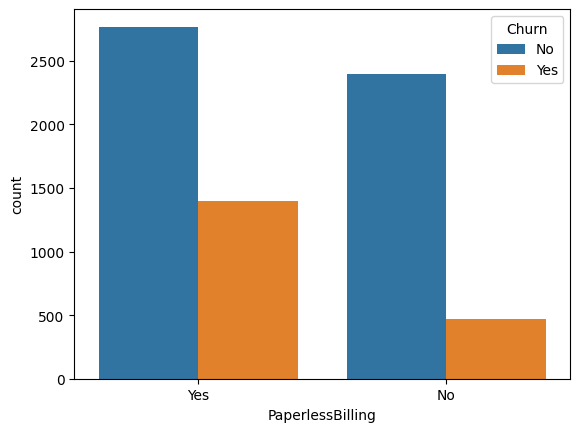

In [38]:
sns.countplot(data=df,x='PaperlessBilling',hue='Churn')
plt.show()

**Insights :**
* Among the customers churning out, highest number of customers have PaperlessBilling while lowest number of customers dont have PaperlessBilling.
* Among the customers not churning out, highest number of customers have PaperlessBilling while lowest number of customers dont have PaperlessBilling.

##### Plotting the count of the customers churning out having different payment methods

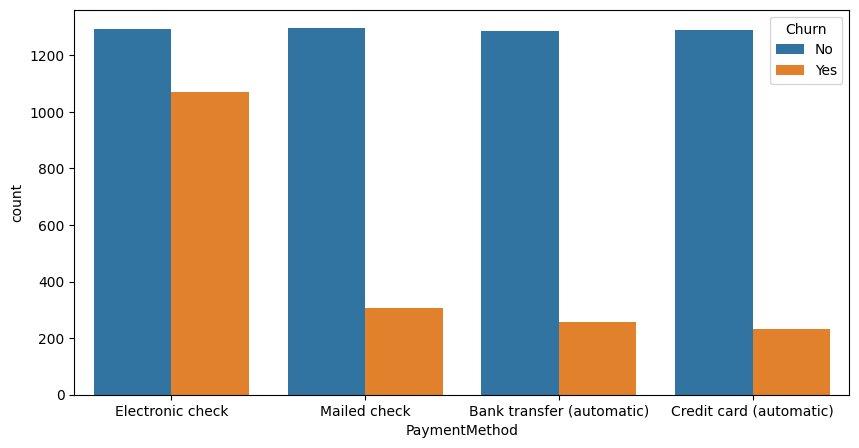

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='PaymentMethod',hue='Churn')
plt.show()

**Insights :**
* The customers who are not churning not have nearly same number of customers for different types of Payment Method.
* Most of the customers who are churning out have Electronic Check as PaymentMethod while lowest number of customers who are churning out have Automatic Credit Card.

##### Converting the categorical columns into numerical columns

In [40]:
le = LabelEncoder()

for col in categorical_columns :
    df[col] = le.fit_transform(df[col])
    print(col)
    print(le.classes_)
    print()

Gender
['Female' 'Male']

Partner
['No' 'Yes']

Dependents
['No' 'Yes']

PhoneService
['No' 'Yes']

MultipleLines
['No' 'No phone service' 'Yes']

InternetService
['DSL' 'Fiber optic' 'No']

OnlineSecurity
['No' 'No internet service' 'Yes']

OnlineBackup
['No' 'No internet service' 'Yes']

DeviceProtection
['No' 'No internet service' 'Yes']

TechSupport
['No' 'No internet service' 'Yes']

StreamingTV
['No' 'No internet service' 'Yes']

StreamingMovies
['No' 'No internet service' 'Yes']

Contract
['Month-to-month' 'One year' 'Two year']

PaperlessBilling
['No' 'Yes']

PaymentMethod
['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']

Churn
['No' 'Yes']



##### Plotting the correlation between the columns

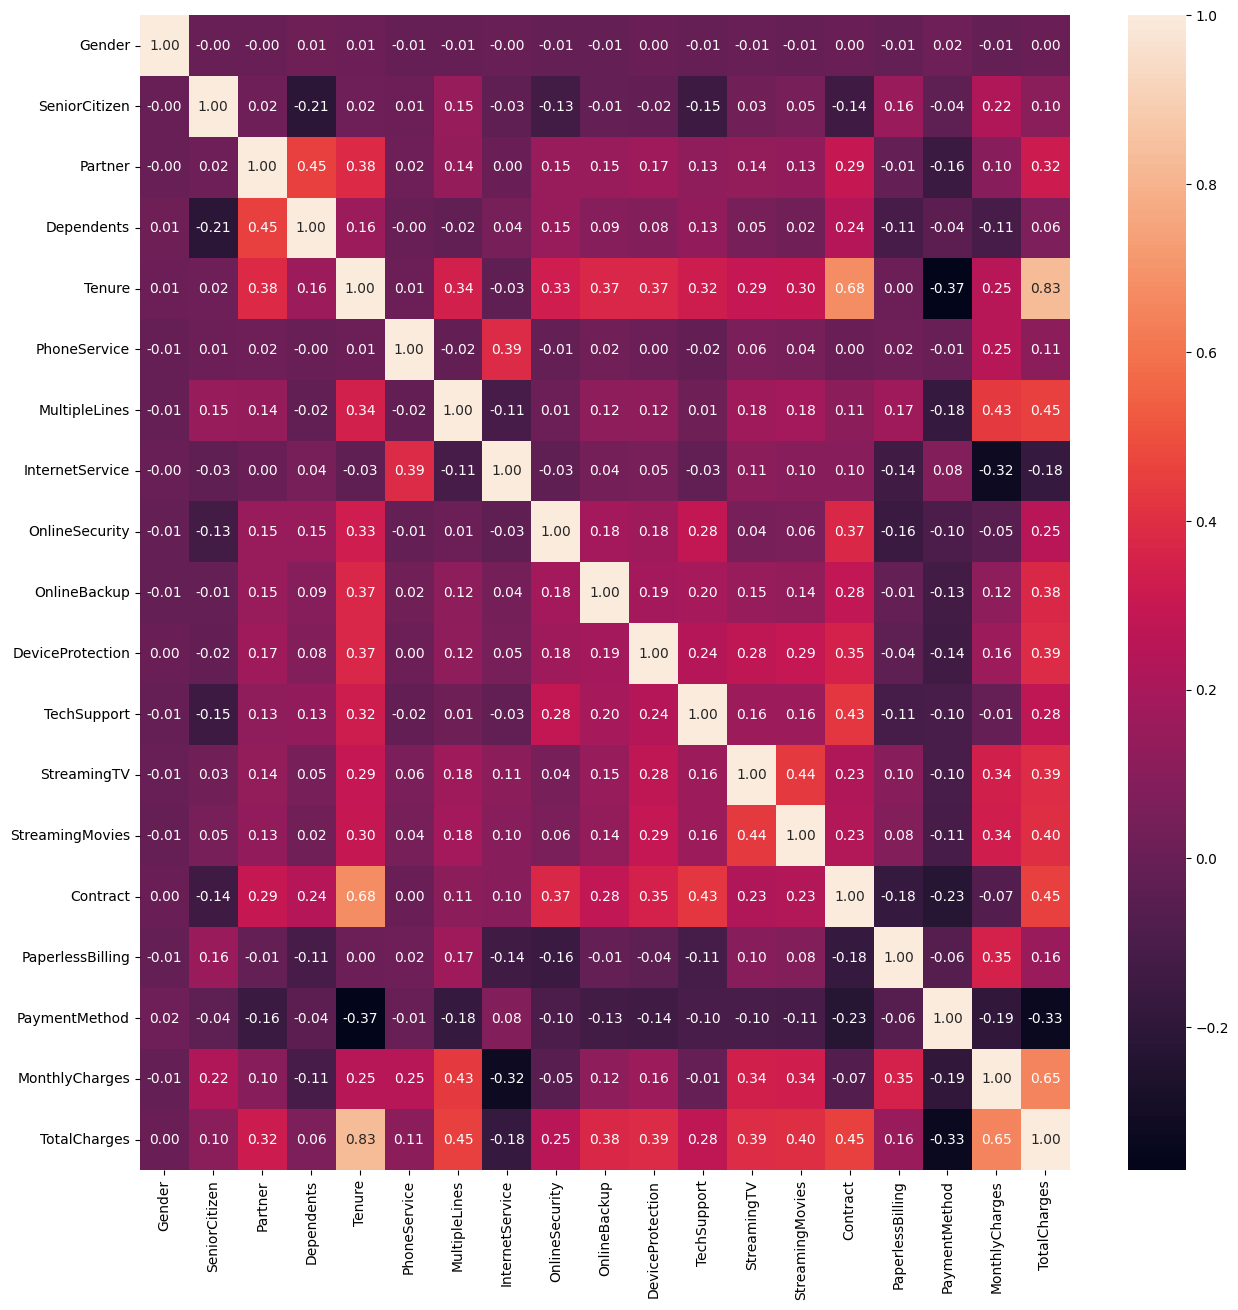

In [41]:
dff = df.iloc[:,:-1]
plt.figure(figsize=(15,15))
sns.heatmap(dff.corr(),annot=True,fmt='.2f')
plt.show()

**Insgihts :**
* From the above plot, we can clearly see that there are no multi-collinearity.

#### Data Preprocessing

##### Splitting the dataset into X-part and Y-part

In [42]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

##### Converting the X-part and Y-part into training and testing sets

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

##### Storing the Testing Sets in separate numpy file

In [44]:
np.save('x_test.npy',x_test)
np.save('y_test.npy',y_test)

##### Standardization of training set

In [45]:
ss = StandardScaler()

x_train = ss.fit_transform(x_train)

##### Storing the Standard Scaler pickle file

In [46]:
with open('Scaler.pkl','wb') as model_file :
    pickle.dump(ss,model_file)

#### Model Training

##### Building the Artificial Neural Network and displaying the model's summary

In [47]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=19,activation='relu',name='INPUT_LAYER'))
model.add(tf.keras.layers.Dense(8, activation='relu',name='HIDDEN_LAYER'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid',name='OUTPUT_LAYER'))
model.build(input_shape=(None,19))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 INPUT_LAYER (Dense)         (None, 19)                380       
                                                                 
 HIDDEN_LAYER (Dense)        (None, 8)                 160       
                                                                 
 OUTPUT_LAYER (Dense)        (None, 1)                 9         
                                                                 
Total params: 549 (2.14 KB)
Trainable params: 549 (2.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### Compiling the model and training it with the training set of values

In [48]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=200, batch_size=128)

Epoch 1/200


44/44 [==============================] - 1s 948us/step - loss: 0.6255 - accuracy: 0.6736
Epoch 2/200
44/44 [==============================] - 0s 792us/step - loss: 0.5063 - accuracy: 0.7632
Epoch 3/200
44/44 [==============================] - 0s 766us/step - loss: 0.4608 - accuracy: 0.7808
Epoch 4/200
44/44 [==============================] - 0s 743us/step - loss: 0.4438 - accuracy: 0.7902
Epoch 5/200
44/44 [==============================] - 0s 792us/step - loss: 0.4343 - accuracy: 0.7936
Epoch 6/200
44/44 [==============================] - 0s 758us/step - loss: 0.4284 - accuracy: 0.7968
Epoch 7/200
44/44 [==============================] - 0s 769us/step - loss: 0.4236 - accuracy: 0.8005
Epoch 8/200
44/44 [==============================] - 0s 820us/step - loss: 0.4201 - accuracy: 0.8027
Epoch 9/200
44/44 [==============================] - 0s 806us/step - loss: 0.4178 - accuracy: 0.8018
Epoch 10/200
44/44 [==============================] - 0s 841us/step - loss: 0.4153 - accu

##### Saving the model in a pickle file

In [49]:
model.save("ann_model.h5")

##### Plotting the Loss vs Epochs and Accuracy vs Epochs

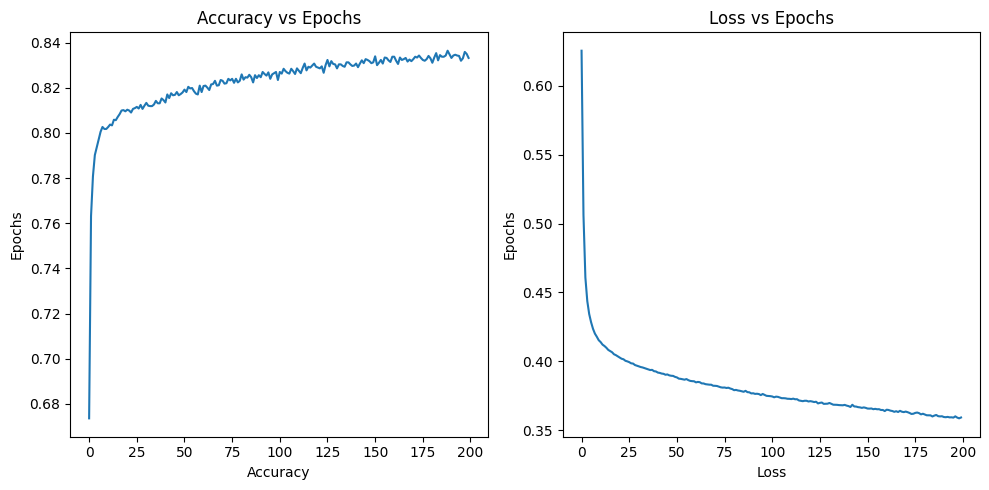

In [50]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(model.history.history['accuracy'])
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.title('Accuracy vs Epochs')
plt.subplot(122)
plt.plot(model.history.history['loss'])
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.title('Loss vs Epochs')
plt.tight_layout()
plt.show()